## Obejective
- Create a streamlit app to predict california house price

## Info
- Ref: https://github.com/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb
- Column Description
    - longitude: A measure of how far west a house is; a higher value is farther west
    - latitude: A measure of how far north a house is; a higher value is farther north
    - housingMedianAge: Median age of a house within a block; a lower number is a newer building
    - totalRooms: Total number of rooms within a block
    - totalBedrooms: Total number of bedrooms within a block
    - population: Total number of people residing within a block
    - households: Total number of households, a group of people residing within a home unit, for a block
    - medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
    - medianHouseValue: Median house value for households within a block (measured in US Dollars)
    - oceanProximity: Location of the house w.r.t ocean/sea

## Import Packages

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

In [5]:
import dill
import json
import requests

In [6]:
import joblib

## Reading Data Scource

<Axes: xlabel='income_cat'>

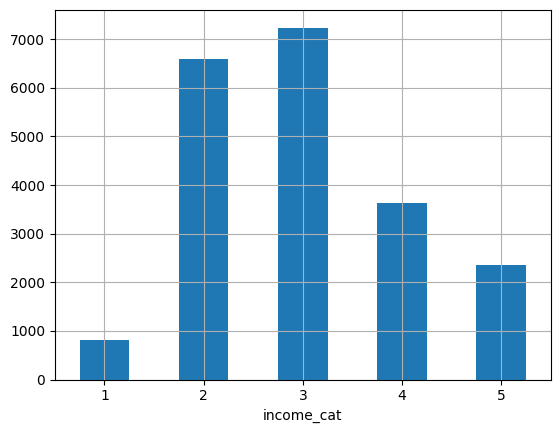

In [8]:
df = pd.read_csv('housing.csv')


# df = pd.read_csv('housing.csv')
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

df["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)

In [9]:
train, test = train_test_split(df, test_size=0.3, stratify=df['income_cat'], random_state=6012024)

## Check stratification
train['income_cat'].value_counts() / len(train['income_cat'])
test['income_cat'].value_counts() / len(test['income_cat'])

income_cat
3    0.350568
2    0.318868
4    0.176287
5    0.114480
1    0.039798
Name: count, dtype: float64

income_cat
3    0.350614
2    0.318798
4    0.176357
5    0.114341
1    0.039890
Name: count, dtype: float64

In [10]:
corr_matrix = train.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.681859
total_rooms           0.130749
housing_median_age    0.107536
households            0.062901
total_bedrooms        0.046569
population           -0.026317
longitude            -0.056267
latitude             -0.133642
Name: median_house_value, dtype: float64

<Figure size 1200x1000 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, 'longitude'),
  Text(1.5, 0, 'latitude'),
  Text(2.5, 0, 'housing_median_age'),
  Text(3.5, 0, 'total_rooms'),
  Text(4.5, 0, 'total_bedrooms'),
  Text(5.5, 0, 'population'),
  Text(6.5, 0, 'households'),
  Text(7.5, 0, 'median_income'),
  Text(8.5, 0, 'median_house_value'),
  Text(9.5, 0, 'income_cat')])

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0, 0.5, 'longitude'),
  Text(0, 1.5, 'latitude'),
  Text(0, 2.5, 'housing_median_age'),
  Text(0, 3.5, 'total_rooms'),
  Text(0, 4.5, 'total_bedrooms'),
  Text(0, 5.5, 'population'),
  Text(0, 6.5, 'households'),
  Text(0, 7.5, 'median_income'),
  Text(0, 8.5, 'median_house_value'),
  Text(0, 9.5, 'income_cat')])

Text(0.5, 90.10937499999994, 'Features')

Text(117.10937499999997, 0.5, 'Features')

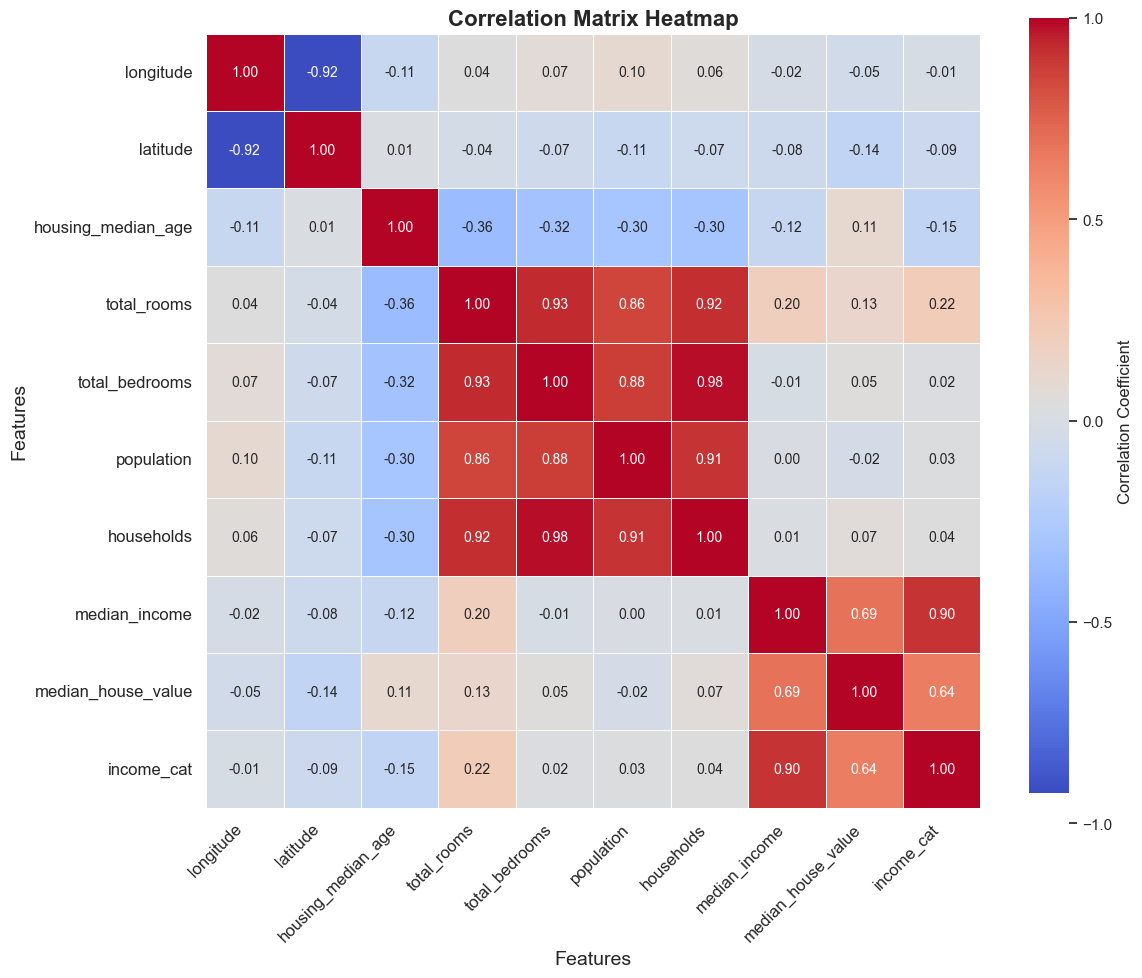

In [14]:
# Assuming df is your DataFrame
correlation_matrix = df.select_dtypes(exclude='object').corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    cbar=True, 
    square=True, 
    linewidths=.5, 
    linecolor='white', 
    annot_kws={"size": 10}  # Adjust font size for annotations
)

# Customize the plot
plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Adjust the colorbar
cbar = plt.gca().collections[0].colorbar
cbar.set_ticks([-1, -0.5, 0, 0.5, 1])
cbar.set_label('Correlation Coefficient', fontsize=12)

# Tight layout for better spacing
plt.tight_layout()

<Figure size 1400x800 with 0 Axes>

C:\Users\Shubham\AppData\Local\Temp\ipykernel_10432\3626745619.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\Shubham\AppData\Local\Temp\ipykernel_10432\3626745619.py:8: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


<Axes: xlabel='ocean_proximity', ylabel='median_house_value'>

Text(0.5, 1.0, 'Ocean Proximity Analysis for Median House Value')

Text(0.5, 0, 'Ocean Proximity')

Text(0, 0.5, 'Median House Value')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'NEAR BAY'),
  Text(1, 0, '<1H OCEAN'),
  Text(2, 0, 'INLAND'),
  Text(3, 0, 'NEAR OCEAN'),
  Text(4, 0, 'ISLAND')])

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.]),
 [Text(0, -100000.0, '−100000'),
  Text(0, 0.0, '0'),
  Text(0, 100000.0, '100000'),
  Text(0, 200000.0, '200000'),
  Text(0, 300000.0, '300000'),
  Text(0, 400000.0, '400000'),
  Text(0, 500000.0, '500000'),
  Text(0, 600000.0, '600000'),
  Text(0, 700000.0, '700000')])

C:\Users\Shubham\AppData\Local\Temp\ipykernel_10432\3626745619.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: title={'center': 'Ocean Proximity Analysis for Median House Value'}, xlabel='Ocean Proximity', ylabel='Median House Value'>

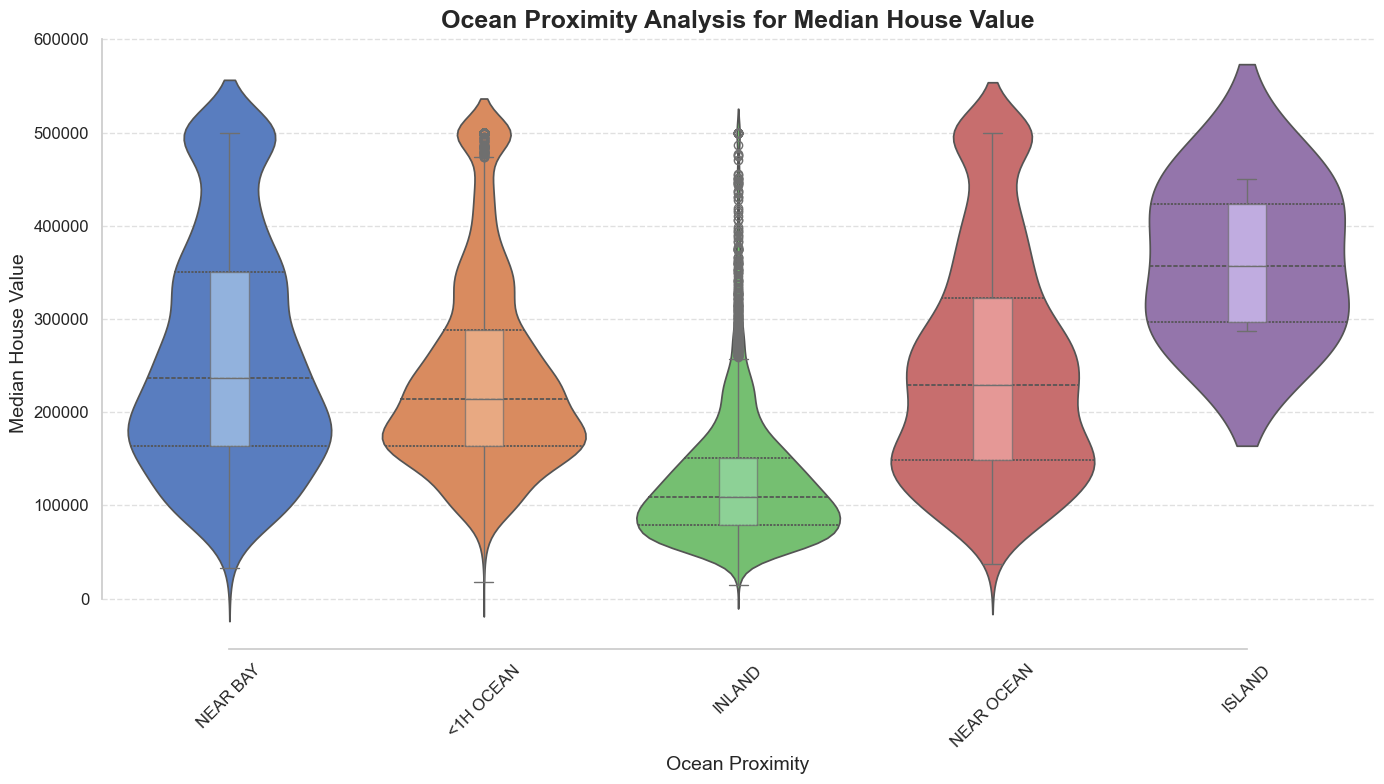

In [15]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a larger figure size for better visibility
plt.figure(figsize=(14, 8))

# Create a violin plot with enhanced aesthetics
sns.violinplot(
    x='ocean_proximity', 
    y='median_house_value', 
    data=train, 
    inner='quartile',  # Show quartiles within the violins for more detail
    palette='muted',   # Use a muted palette for aesthetic reasons
    scale='width'      # Adjust the width of the violins based on the number of observations
)

# Set titles and labels with larger fonts for better readability
plt.title('Ocean Proximity Analysis for Median House Value', fontsize=18, fontweight='bold')
plt.xlabel('Ocean Proximity', fontsize=14)
plt.ylabel('Median House Value', fontsize=14)

# Improve tick visibility
plt.xticks(rotation=45, fontsize=12)  # Rotate x labels to prevent overlap
plt.yticks(fontsize=12)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Add a box plot to show additional statistical information
sns.boxplot(
    x='ocean_proximity', 
    y='median_house_value', 
    data=train, 
    whis=1.5, 
    width=0.15, 
    palette='pastel', 
    boxprops=dict(alpha=0.7)
)

# Remove the top and right spines for a cleaner look
sns.despine(trim=True)

# Tight layout for better spacing
plt.tight_layout()

In [16]:
class Preprocessor(BaseEstimator, TransformerMixin): 
    # Train our custom preprocessors 
    numerical_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income', ]
    categorical_columns = ['ocean_proximity', 'income_cat']
    
    def fit(self, X, y=None): 

        # Create and fit simple imputer
        self.imputer = SimpleImputer(strategy='median')
        self.imputer.fit(X[self.numerical_columns])
        
        # Create and fit Standard Scaler 
        self.scaler = StandardScaler()
        self.scaler.fit(X[self.numerical_columns]) 
        
        # Create and fit one hot encoder
        self.onehot = OneHotEncoder(handle_unknown='ignore')
        self.onehot.fit(X[self.categorical_columns])
        
        return self 

    def transform(self, X): 
        
        # Apply simple imputer 
        imputed_cols = self.imputer.transform(X[self.numerical_columns])
        onehot_cols = self.onehot.transform(X[self.categorical_columns])
        
        # Copy the df 
        transformed_df = X.copy()
         
        # Apply transformed columns
        transformed_df[self.numerical_columns] = imputed_cols
        transformed_df[self.numerical_columns] = self.scaler.transform(transformed_df[self.numerical_columns])        
        
        # Drop existing categorical columns and replace with one hot equiv
        transformed_df = transformed_df.drop(self.categorical_columns, axis=1) 
        transformed_df[self.onehot.get_feature_names_out()] = onehot_cols.toarray().astype(int)
        
        return transformed_df

In [17]:
X_train = train.drop('median_house_value', axis=1)
y_train = train['median_house_value']
preproc = Preprocessor()
preproc.fit(X_train)
preprocessed_df = preproc.transform(X_train)
preprocessed_df.head()

Preprocessor()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,income_cat_1,income_cat_2,income_cat_3,income_cat_4,income_cat_5
11052,-1.423273,1.015372,1.861228,0.306580,0.784997,-0.214370,0.595966,-0.263125,0,0,0,1,0,0,0,1,0,0
19511,-1.193655,0.771912,-0.922621,-0.596595,-0.631782,-0.889467,-0.631715,-1.135759,1,0,0,0,0,0,1,0,0,0
18564,0.643289,-0.848031,1.065843,-0.809565,-0.781041,-0.536137,-0.736421,-0.002022,1,0,0,0,0,0,0,1,0,0
17223,1.297201,-0.885486,-0.684005,0.962893,1.031393,0.774602,1.059291,-0.421214,0,1,0,0,0,0,0,1,0,0
1862,0.653272,-0.754392,1.304459,-0.847579,-0.634151,-0.344129,-0.691921,-1.467318,1,0,0,0,0,1,0,0,0,0


In [18]:
rfr = make_pipeline(Preprocessor(), RandomForestRegressor())
rfr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor', Preprocessor()),
                ('randomforestregressor', RandomForestRegressor())])

In [29]:
# Predictions for training set
y_train_hat = rfr.predict(X_train)

# Calculate metrics
rmse = root_mean_squared_error(y_train, y_train_hat)
mae = mean_absolute_error(y_train, y_train_hat)
r2 = r2_score(y_train, y_train_hat)

# Print the metrics
print(f'Train Set Metrics:')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Train Set Metrics:
Root Mean Squared Error (RMSE): 18726.67
Mean Absolute Error (MAE): 12118.22
R-squared (R2): 0.97


In [30]:
# Prepare the test data
X_test = test.drop('median_house_value', axis=1)
y_test = test['median_house_value']

# Predictions for test set
y_test_hat = rfr.predict(X_test)

# Calculate metrics for the test set
rmse_test = root_mean_squared_error(y_test, y_test_hat)
mae_test = mean_absolute_error(y_test, y_test_hat)
r2_test = r2_score(y_test, y_test_hat)

# Print the metrics
print(f'Test Set Metrics:')
print(f'Root Mean Squared Error (RMSE): {rmse_test:.2f}')
print(f'Mean Absolute Error (MAE): {mae_test:.2f}')
print(f'R-squared (R2): {r2_test:.2f}')

Test Set Metrics:
Root Mean Squared Error (RMSE): 48134.42
Mean Absolute Error (MAE): 31450.14
R-squared (R2): 0.83


In [31]:
with open('rfr.pkl', 'wb') as f:
    dill.dump(rfr, f)

In [34]:
options = {}
numerical_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income', ]
for column in numerical_columns:
    options[column] = (X_train[column].min(),  X_train[column].max())
for column in ['ocean_proximity']:
    options[column] = sorted(X_train[column].unique().tolist())

model = {
    'version': '1.0',
    'name': 'RandomForestRegressor',    
    'Comments': 'Initial model',
    'model_file': 'rfr.pkl',
    'options': options,
}

with open('rfr_info.json', 'w') as f:
    json.dump(model, f, indent=2)

print(json.dumps(X_test.iloc[0].to_dict(), indent=2))

{
  "longitude": -122.29,
  "latitude": 37.92,
  "housing_median_age": 32.0,
  "total_rooms": 1736.0,
  "total_bedrooms": 234.0,
  "population": 602.0,
  "households": 231.0,
  "median_income": 6.516,
  "ocean_proximity": "NEAR BAY",
  "income_cat": 5
}


In [40]:
options = {}
numerical_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income', ]
for column in numerical_columns:
    options[column] = (X_train[column].min(),  X_train[column].max())
for column in ['ocean_proximity']:
    options[column] = sorted(X_train[column].unique().tolist())

model = {
    'version': '1.0',
    'name': 'RandomForestRegressor',    
    'Comments': 'Deploy model',
    'model_file': 'rfr.pkl',
    'options': options,
}

import json
with open('rfr_info.json', 'w') as f:
    json.dump(model, f, indent=2)

In [38]:
print(json.dumps(X_test.iloc[0].to_dict(), indent=2))

{
  "longitude": -122.29,
  "latitude": 37.92,
  "housing_median_age": 32.0,
  "total_rooms": 1736.0,
  "total_bedrooms": 234.0,
  "population": 602.0,
  "households": 231.0,
  "median_income": 6.516,
  "ocean_proximity": "NEAR BAY",
  "income_cat": 5
}
